## Q. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### 1) Delivery_time -> Predict delivery time using sorting time

## 1. Import Necessary Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf


## 2. Import Data

In [6]:
delivery_data = pd.read_csv("E:\Data Science by John\Assignments\Assignment 4- Simple Linear Regression\delivery_time.csv")
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3. Data Understanding

### 3.1 Perform Initial Analysis

In [7]:
delivery_data.shape

(21, 2)

In [8]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [12]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## 3.2 Assumptions Check

### 1. Linearity

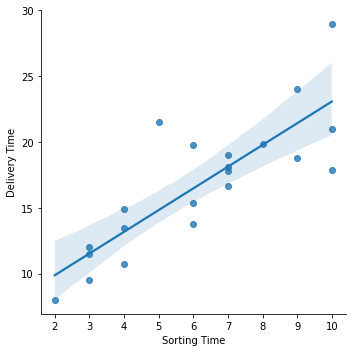

In [13]:
sns.lmplot(x='Sorting Time', y='Delivery Time', data=delivery_data)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

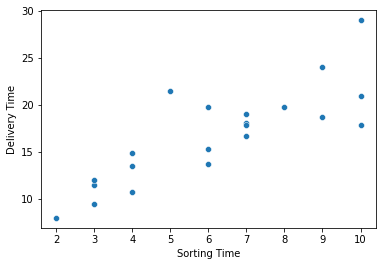

In [14]:
sns.scatterplot(x='Sorting Time', y='Delivery Time', data=delivery_data)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [15]:
delivery_data.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [16]:
delivery_data.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

### Linearity test is Failed

## 2. Normality

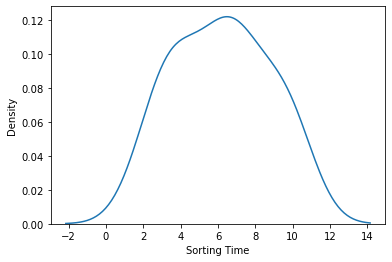

In [17]:
sns.distplot(a= delivery_data['Sorting Time'],hist = False)
plt.show()

### Normality test is Failed

## 3. No Multicolinearity II 4. No Autoregression 

These test are passed because we have only one input so No Multicollinearity
& We don't have datetime datatype of our data

## 4. Data Preparation

In [18]:
delivery_data.columns = [column.replace(" ","_") for column in delivery_data.columns]
delivery_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## 5. Model Building II 6. Model Training

Linear Regression model can be built by using any of the 2 libraries:

1. Statmodels
2. sklearn

## Using Statsmodels:

In [19]:
linear_model_sm = smf.ols(formula = 'Delivery_Time ~ Sorting_Time', data = delivery_data).fit()
linear_model_sm

In [20]:
linear_model_sm.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

## 7. Model Testing

In [21]:
delivery_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
Delivery_Time_Pred = linear_model_sm.predict(delivery_data['Sorting_Time'])
Delivery_Time_Pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

## 8. Model Evaluation

In [23]:
error = delivery_data['Delivery_Time'] - Delivery_Time_Pred
error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

## .....back to Assumption Check

## 5. Homoscedasticity Check

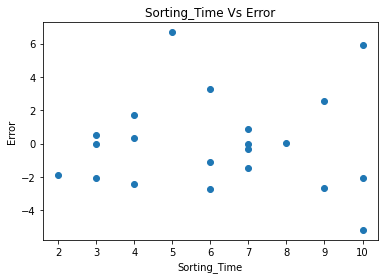

In [24]:
plt.scatter(x= delivery_data['Sorting_Time'], y=error)
plt.title('Sorting_Time Vs Error')
plt.xlabel('Sorting_Time')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Check is Passed

## 6. Zero Residual Mean across the Fitted Line.

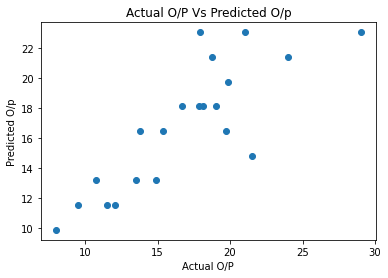

In [25]:
plt.scatter(x=delivery_data['Delivery_Time'],y=Delivery_Time_Pred)
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

### Zero Residual Mean Test is Failed

## 8.1 Evaluation Metrics of Linear Regression

In [26]:
print('R2Score     :',linear_model_sm.rsquared.round(4)) #Overall Contribution of Predictors
print('Adj.R2Score :',linear_model_sm.rsquared_adj.round(4)) #Overall Contribution of Predictors
print('AIC Value   :',linear_model_sm.aic.round(4)) #Error Impurity
print('BIC Value   :',linear_model_sm.bic.round(4)) #Error Impurity

R2Score     : 0.6823
Adj.R2Score : 0.6655
AIC Value   : 106.714
BIC Value   : 108.803


## 9. Model Prediction

### 9.1 Manual Prediction

In [28]:
linear_model_sm.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [27]:
# Manual prediction for sorting time 10
delivery_time = (6.582734) + (1.649020)*(10)
delivery_time

23.072933999999997

In [29]:
# Manual prediction for sorting time 20
delivery_time = (6.582734) + (1.649020)*(20)
delivery_time

39.563134

### 9.2 Automatic Prediction using model

In [36]:
delivery_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [37]:
test_data = pd.DataFrame(data = {"Sorting_Time":[10,20]})
test_data

,Sorting_Time
0,10
1,20


In [38]:
linear_model_sm.predict(test_data)

0    23.072933
1    39.563132
dtype: float64